# Comparação de Performance: Prim x Kruskal

In [1]:
import grafos
import networkx as nx
import time

from matplotlib import pyplot as plt

### Implementação dos algoritmos de Prim e de Kruskal

In [59]:
def prim(graph: nx.Graph, root):
    result = nx.Graph()
    possible_edges = list(graph.edges(root, data=True))
    
    for _ in range(0, graph.order()-1):
        
        edge = min(possible_edges, key=lambda x: x[2]["weight"])
        u, v, d = edge
        w = d["weight"]
        
        result.add_edge(u, v, weight=w)
        new_possible_edges = list(graph.edges(v, data=True))
        possible_edges.extend(new_possible_edges)
        possible_edges.remove(edge)
        possible_edges = [edge for edge in possible_edges if edge[1] not in result]
        
    return result
        

In [48]:
def kruskal(graph: nx.Graph):
    result = nx.Graph()
    parents = [node for node in graph.nodes()]
    sorted_edges = sorted(graph.edges(data=True), key=lambda x: x[2]["weight"])
    
    e = 0
    for u, v, d in sorted_edges:
        w = d["weight"]
        
        u_root = find(u, parents)
        v_root = find(v, parents)
        
        if u_root != v_root:
            result.add_edge(u, v, weight=w)
            union(u, v, parents)
            e += 1
            
        if e > graph.order():
            break
        
    return result


def find(node, parents):
    if parents[node] == node:
        return node
    else:
        result = find(parents[node], parents)
        parents[node] = result
        return result


def union(u, v, parents):
    u_root = find(u, parents)
    v_root = find(v, parents)
    parents[u_root] = v_root

### Testando os algoritmos

A implementação do algoritmo de criação do grafo pode ser verificada em grafos.py

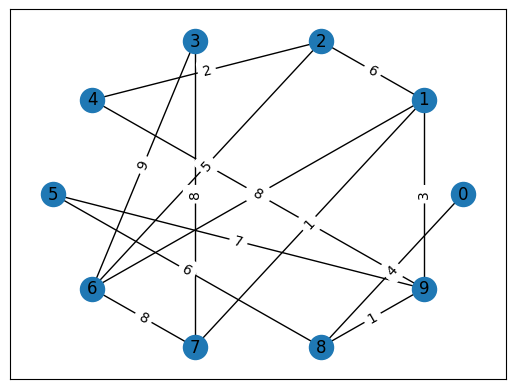

In [65]:
grafo = grafos.generate_random_connected_graph(10, 0.3)
grafos.draw_graph(grafo, nx.circular_layout) # usar apenas para pequenas quantidades de vértices (<100)

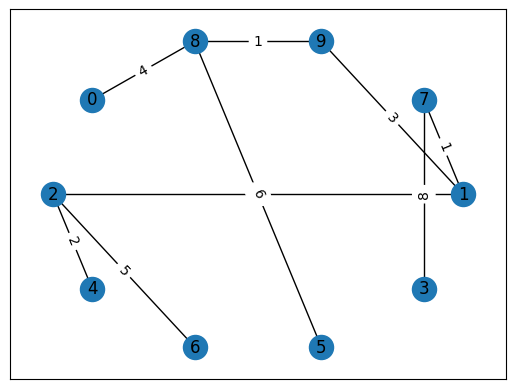

In [66]:
grafos.draw_graph(prim(grafo, 1), nx.circular_layout)

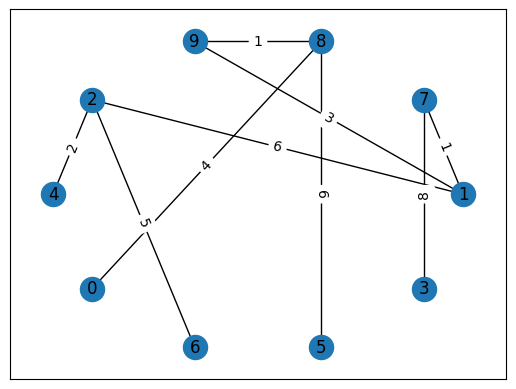

In [67]:
grafos.draw_graph(kruskal(grafo), nx.circular_layout)

### Comparando o tempo do Prim e do Kruskal
Geramos grafos com diferentes tamanho, e comparamos o tempo de execução dos dois algoritmos
para cada um desses grafos.